# Random Walk


As a physics student sometimes you see some random movement in nature like brownian motion(it's actually deterministic). we can use stochastic litrature to study brownian motion and find lots of valuable information about this process. Random walk is somehow one of the most instructive models that can help you understand how random process can model the nature.

for the beging let's see what random walk is. according to Wikipedia(https://en.wikipedia.org/wiki/Random_walk) random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers.

An elementary example of a random walk is the random walk on the integer number line, ${\displaystyle \mathbb {Z} }$ , which starts at 0 and at each step moves +1 or −1 with equal probability. Other examples include the path traced by a molecule as it travels in a liquid or a gas (see Brownian motion), the search path of a foraging animal, the price of a fluctuating stock and the financial status of a gambler: all can be approximated by random walk models, even though they may not be truly random in reality.

We know that you are passionate and want to explore all details of these process(joke :) ) but for the begining let's start with the simplest model, one dimensional random walk with same probability for right and left step.

1. the simplest model of random walk is a One-dimensional random walk, which starts at 0 and at each step moves +1 or −1 with equal probability. consider 10000_step 1d random walk. and use $10^5$ ensemble. in each ensemble begin from the origin(0) and record the endpoint at 10000th step. plot the PDF of these endpoints. also, calculate the first four moments of this PDF.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [ ]:
def RandomWalk(step, ensemble, prob = 0.5):
  rand = 2* np.random.binomial(1, prob, size = (ensemble, step)) -1 
  endpoint = rand.sum(axis =1)
  return endpoint

In [ ]:
end = RandomWalk(10000, 100000)

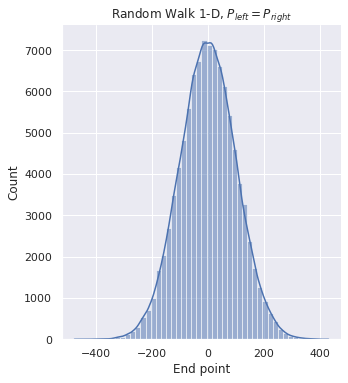

In [ ]:
sns.set_theme()
sns.displot(end,bins = 50, kde=True)
plt.title(r"Random Walk 1-D, $P_{left} = P_{right}$")
plt.xlabel('End point')
plt.show()

In [ ]:
#1st moment and mean
np.array(end).mean()

0.19166

In [ ]:
#2nd moment
scipy.stats.moment(end, moment=2)

10023.6038664444

In [ ]:
#variance
np.array(end).var()

10023.6038664444

In [ ]:
#3rd moment
scipy.stats.moment(end, moment=3)

224.40864851828366

In [ ]:
#skewness
scipy.stats.skew(end)

0.00022361644958194705

In [ ]:
#4th moment
scipy.stats.moment(end, moment=4)

303181626.16362464

In [ ]:
#Curtosis
scipy.stats.kurtosis(end)

0.017554260010264944

now look at the plot you create. does it looklike a normal distribution? if yes isn't it strange cause we know that the probability is bionomial not guassian.


**Yes because if the probability of success p = 0.5 and sample size (n) is very large, binomial distribution approximates Normal distribution.**

2.change the probability of jumping to right and left in a way that $P_{left} = 2 P_{right}$ and then repeat the process of Q1 again and evaluate the PDF and first four moments and cumulants. 

In [ ]:
_ensemble = []
for i in range(10**5):
  e = RandomWalk(1000, 2/3)
  _ensemble.append(e)

In [ ]:
end2 = RandomWalk(10000, 100000, 2/3)

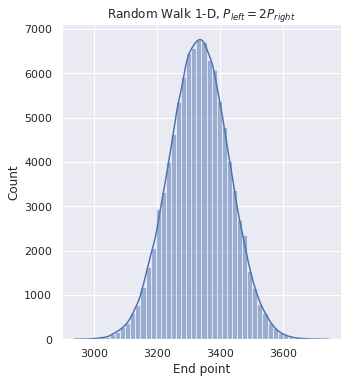

In [ ]:
sns.displot(end2 ,bins = 50, kde=True)
plt.title(r"Random Walk 1-D, $P_{left} = 2 P_{right}$")
plt.xlabel('End point')
plt.show()

In [ ]:
#1st moment and mean
np.array(end2).mean()

3332.95668

In [ ]:
#2nd moment
scipy.stats.moment(end2, moment=2)

8905.1380433776

In [ ]:
#variance
np.array(end2).var()

8905.1380433776

In [ ]:
#3rd moment
scipy.stats.moment(end2, moment=3)

-13462.208858581456

In [ ]:
#skewness
scipy.stats.skew(end2)

-0.0160197354541408

In [ ]:
#4th moment
scipy.stats.moment(end2, moment=4)

237426752.45479628

In [ ]:
#Curtosis
scipy.stats.kurtosis(end2)

-0.0060238250095965284

according to your result, can you tell how the shape of PDF function related to its cumulants?

**1st cumulant → mean of data → function is symmatric around mean**

**2nd cumulant → variance of data → standard deviation = $\sqrt{variance}$ → About 68% of values drawn from a normal distribution are within one standard deviation**

**3th cumulant → skewness → a skewness value greater than zero means that there is more weight in the right tail of the distribution**

**4th cumulant → Curtosis → high kurtosis tend to have heavy tails**

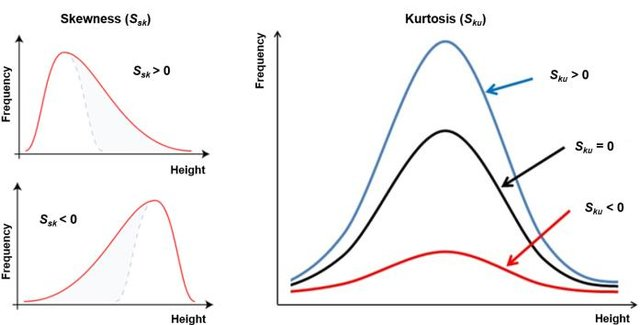

# Conditional Probability


Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice? if Yes write a it's code to tell Us why and if your answer is No code it to prove the first group they are wrong:)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def Monty():
  doors = ['C', 'G', 'G']
  np.random.shuffle(doors)
  my_choice = np.random.choice([0, 1, 2])
  stay = doors.pop(my_choice)
  doors.remove('G')
  switch = doors[0]
  return stay, switch

In [ ]:
Stay = []
Switch = []
n = 10**5
for i in range(n):
  st,sw = Monty()
  Stay.append(st)
  Switch.append(sw)

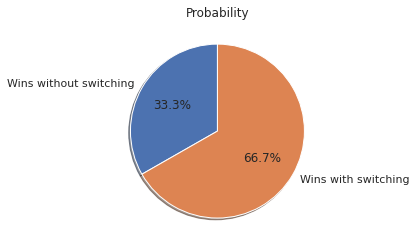

In [ ]:
x = [Stay.count('C') /n , Switch.count('C') / n]
label = ['Wins without switching', 'Wins with switching']
plt.pie(x,labels = label, startangle=90, autopct='%1.1f%%', shadow = True)
plt.title('Probability')
plt.show()

# Centeral limit theorem

Choose a non-Gaussian distribution (uniform/bionomial/poission) and generate $10^5$ random variables for each of them.                                                      
a) plot the PDF of samples you created .                                                   
b) create $10^4$ random subset of length {2 , 5 , 10 , 20 , 100} from the first non-Gaussian distribution and caclculate mean of each subset, then plot the PDF of these means.                                                                       
c) what do you understand form comparing the original distribution with those five?


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
rand = np.random.uniform(0,1,10**5)

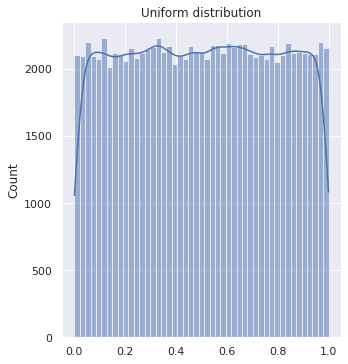

In [ ]:
sns.set_theme()
sns.displot(rand, kde=True)
plt.title('Uniform distribution')
plt.show()

In [ ]:
#runtime in colab = 2m 3s!!
num_sub = [2 , 5 , 10 , 20 , 100]
sub = []
for n in num_sub:
  for i in range(10**4):
    sub.append(np.random.choice(rand, n, replace = False))

In [ ]:
mean = []
for s in sub:
  mean.append(s.mean())

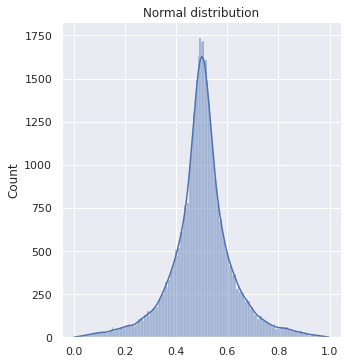

In [ ]:
sns.displot(mean, kde=True)
plt.title("Normal distribution")
plt.show()

**The distribution of the sample means will be approximately normally distributed**

# Poission Approximation

Use python libraries to generate bionomial and poission distributions for different N’s (remember $\lambda =NP$). Over plot them for N = {5, 10, 20, 50, 100, 200, 1000}
How does it behave as N increases? 



In [ ]:
import numpy as np
import plotly.figure_factory as ff

In [ ]:
N = [5, 10, 20, 50, 100, 200, 1000]
p = 0.1 #in p close to one or zero is better approximation
size = 10**4
data = []
for n in N:
  rand_b = np.random.binomial(n, p , size)
  rand_p = np.random.poisson(n*p, size)
  data.append(rand_b)
  data.append(rand_p)

In [ ]:
lable =[]
for i in N:
  for j in ['binomial','poission']:
    a = 'N = '+ str(i) + ' & distribution = ' + j
    lable.append(a)

In [ ]:
fig = ff.create_distplot(data ,lable, curve_type='normal', show_rug=False)
fig.show()

# Box Muller Method

1- generate Normal distribution from uniform distribution (Box-Muller algorithm(https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform)- do not need to derive and prove it. the topic will be included in lectures in the following week). Normal= zero mean, unit variance    
a)Sample many points from this distribution. plot the pdf of the sample (plot hist).             
                              


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

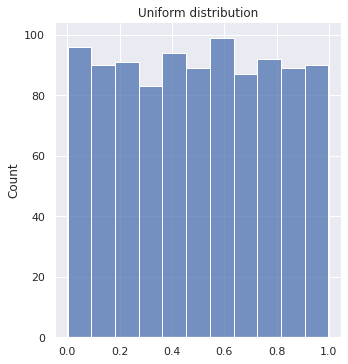

In [ ]:
ran = np.random.uniform(0, 1, 1000) 
sns.displot(ran)
plt.title('Uniform distribution')
plt.show()

In [ ]:
def GenerateNormal():
  u1, u2 = np.random.uniform(0, 1, 2)
  z1 = ((-2*np.log(u1))**(0.5))* np.cos(2*np.pi*u2)
  z2 = ((-2*np.log(u2))**(0.5))* np.sin(2*np.pi*u1)
  return z1,z2

In [ ]:
normal = []
for i in range(1000):
  z1,z2 = GenerateNormal()
  normal.append(z1)
  normal.append(z2)

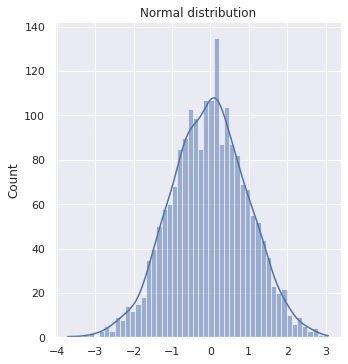

In [ ]:
sns.displot(normal, kde=True, bins= 50)
plt.title('Normal distribution')
plt.show()

b)Calculate mean of the sample. Its variance.

In [ ]:
mu = np.array(normal).mean()
mu # it must be close to 0

-0.03212304035830963

In [ ]:
sigma2 = np.array(normal).var()
sigma2 #it must be close to 1

0.9978418631208347

c)Overplot the pdf now, using this mean and variance (on the plot hist). Also use the mean and std deviation functions from python library. Do they agree?

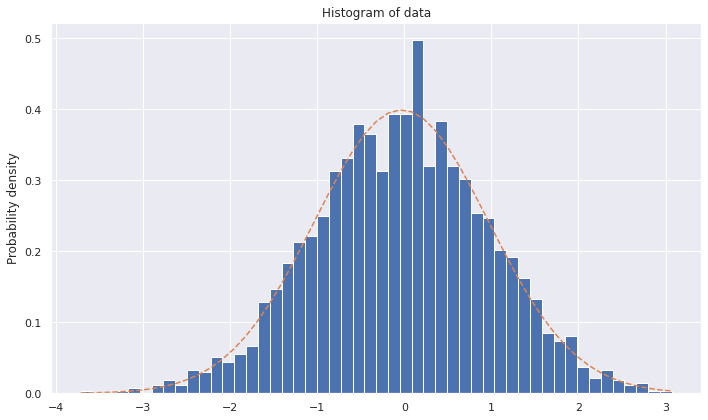

In [ ]:
sigma = (sigma2)**(0.5)  # standard deviation of distribution
num_bins = 50

fig, ax = plt.subplots(figsize=(10,6))

n, bins, patches = ax.hist(normal, num_bins, density=True)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of data')

fig.tight_layout()
plt.show()

d)Now that you have your Normal distribution, how can you turn it into a Gaussian distribution with  given mean and variance? For example mean=2, and std dev=4 ?   

In [ ]:
def GenerateGaussian(x, m ,s):
  return (x*s)+ m
gaussian = []
for i in normal:
  gaussian.append(GenerateGaussian(i,2,4))

In [ ]:
np.array(gaussian).std()

3.9956813949479697

In [ ]:
np.array(gaussian).mean()

1.8715078385667616

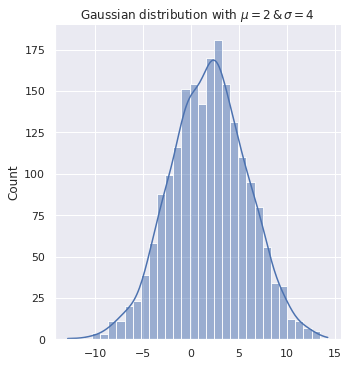

In [ ]:
sns.displot(gaussian, kde= 'gaussian')
plt.title(r"Gaussian distribution with $\mu = 2 \, &\,  \sigma = 4 $")
plt.show()

there are two problems left, but you can choose one of them to solve.(we highly recommend you to solve both of them)

# Nice Matrix

A matrix of size n$\times$n which include numbers of {1,2,3,...,$n^2$} is called nice, if sum of all rows and columns  are the same. write a code that get n as a input and return a n$\times$n Nice Matrix. print out the examples of Nice Matrix for n = 4,5,6

In [1]:
import numpy as np

In [10]:
def GenerateNiceMatrix(N):
  '''
  input:
  N --> size of matrix
  output:
  Generate Nice Matrix N by N
  Reference:https://www.magic-squares.info/en.html
  '''

  def oddorder(N):
    '''
    use de la loubere's method
    '''
    matrix = np.zeros((N,N), dtype=int)
    n = 1
    i, j = 0, N//2

    while n <= N**2:
        matrix[i, j] = n
        n += 1
        newi, newj = (i-1) % N, (j+1)% N
        if matrix[newi, newj]:
            i += 1
        else:
            i, j = newi, newj
    return matrix
  
  def Singlyevenorder(N):
    '''
    use Al-Asfizari:9-Block-Method
    '''
    matrix = np.array([ i for i in range(1, N**2+1)]).reshape(N,N)
    j = N//4
    for i in range(N//4):
      while j < 3*N/4:
        matrix[i,j]= N**2 - matrix[i,j] + 1
        matrix[i+3*N//4,j]= N**2 - matrix[i+3*N//4,j] + 1
        j += 1
      j = N//4

    j = 0
    for i in range(N//4, 3*(N//4)):
      while j< N/4:
        matrix[i,j]= N**2 - matrix[i,j] + 1
        matrix[i,j+3*N//4]= N**2 - matrix[i,j+3*N//4] + 1
        j += 1
      j = 0
    return matrix
  
  def Doublyevenorder(N):
    '''
    use Strachey method
    '''
    matrix = np.zeros((N,N), dtype=int)
    m = N//2
    K = (N - 2) //4
    mat = oddorder(m)

    for i in range(m):
      for j in range(m):
        matrix[i,j] = mat[i,j]
        matrix[i,j+m] = mat[i,j] + 2*m**2

    for i in range(m,2*m):
      for j in range(m):
        matrix[i,j] = mat[i-m,j] + 3*m**2
        matrix[i,j+m] = mat[i-m,j] + m**2
    
    for i in range(m):
      for k in range(1, K):
        matrix[i,-k], matrix[i+m,-k] = matrix[i+m,-k] , matrix[i,-k]
  

    for i in range(0, m//2):
      for k in range(0, K):
        matrix[i,k], matrix[i+m,k] = matrix[i+m,k] , matrix[i,k]

    for k in range(0,K):
      matrix[m//2,k+1], matrix[m//2+m,k+1] = matrix[m//2+m,k+1] , matrix[m//2,k+1]

    for i in range(m//2+1, m):
      for k in range(0, K):
        matrix[i,k], matrix[i+m,k] = matrix[i+m,k] , matrix[i,k]

    return matrix


  if N%2 == 1:
    return oddorder(N)
  elif N % 4 == 0:
    return Singlyevenorder(N)
  else:
    return Doublyevenorder(N)
    

In [17]:
print(GenerateNiceMatrix(4))

[[ 1 15 14  4]
 [12  6  7  9]
 [ 8 10 11  5]
 [13  3  2 16]]


In [18]:
print(GenerateNiceMatrix(5))

[[17 24  1  8 15]
 [23  5  7 14 16]
 [ 4  6 13 20 22]
 [10 12 19 21  3]
 [11 18 25  2  9]]


In [19]:
print(GenerateNiceMatrix(6))

[[35  1  6 26 19 24]
 [ 3 32  7 21 23 25]
 [31  9  2 22 27 20]
 [ 8 28 33 17 10 15]
 [30  5 34 12 14 16]
 [ 4 36 29 13 18 11]]


# Honest and Liers

Suppose there 16 People sit around a circular table.  ٍEach claims that the two people next to him/her are liars. How many liars are there in the crowd? 

In [ ]:
#code here 